In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow_hub as hub
from tqdm import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Cnn(nn.Module):
    
    def __init__(self,vocab_size,seq_len,output_dim,embed_dim=100):
        super(Cnn, self).__init__()
        self.embedding = nn.Embedding(vocab_size,embed_dim)

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=300, kernel_size=(3,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-2,1), stride=1)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=300, kernel_size=(2,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-1,1),stride=1)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=5, kernel_size=(6,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-5,1),stride=1)
        )
        
        self.fc1 = nn.Linear(in_features=605, out_features=output_dim)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=1000, out_features=500)
        self.fc3 = nn.Linear(in_features=500, out_features=100)
        self.fc4 = nn.Linear(in_features=100, out_features=10)
        
    def forward(self, x):
        x = self.embedding(x)
        
        out1 = self.layer1(x).squeeze(-1).squeeze(-1)
        out2= self.layer2(x).squeeze(-1).squeeze(-1)
        
        out3 = self.layer3(x).squeeze(-1).squeeze(-1)

        out4 = torch.cat((out1,out2,out3),dim=1)
        
        lin1 = self.fc1(out4)
        '''lin1 = self.drop(lin1)
        lin2 = self.fc2(lin1)
        lin2 = self.drop(lin2)
        lin3 = self.fc3(lin2)
        lin3 = self.drop(lin3)
        lin4 = self.fc4(lin3)
        '''
        return lin1


In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow_hub as hub
from tqdm import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
class CnnSen(nn.Module):
    
    def __init__(self,input_dim,seq_len,output_dim):
        super(CnnSen, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=500, kernel_size=(3,input_dim)),
            #nn.BatchNorm2d(200),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-2,1), stride=1)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=500, kernel_size=(2,input_dim)),
            #nn.BatchNorm2d(200),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-1,1),stride=1)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=5, kernel_size=(6,input_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(seq_len-5,1),stride=1)
        )
        
        self.fc1 = nn.Linear(in_features=1005, out_features=100)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=1000, out_features=500)
        self.fc3 = nn.Linear(in_features=500, out_features=100)
        self.fc4 = nn.Linear(in_features=100, out_features=output_dim)
        
    def forward(self, x):

        out1 = self.layer1(x).squeeze(-1).squeeze(-1)
        out2= self.layer2(x).squeeze(-1).squeeze(-1)
        
        out3 = self.layer3(x).squeeze(-1).squeeze(-1)

        out4 = torch.cat((out1,out2,out3),dim=1)
        
        lin1 = self.fc1(out4)
        '''lin1 = self.drop(lin1)
        lin2 = self.fc2(lin1)
        lin2 = self.drop(lin2)
        lin3 = self.fc3(lin2)'''
        lin3 = self.drop(lin1)
        lin4 = self.fc4(lin3)
        return lin4
    

    
    

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CnnLstm(nn.Module):
    
    def __init__(self,vocab_size,seq_len,output_dim,embed_dim=100):
        super(CnnLstm, self).__init__()
        self.embedding = nn.Embedding(vocab_size,embed_dim)

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=30, kernel_size=(100,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=(seq_len-99,1), stride=1)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=100, kernel_size=(4,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=(seq_len-3,1),stride=1)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=50, kernel_size=(6,embed_dim)),
            #nn.BatchNorm2d(100),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=(seq_len-5,1),stride=1)
        )
        
        self.lstm = nn.LSTM(input_size=30,hidden_size=output_dim,num_layers=1,batch_first=True)
        
    
    def forward(self, x):
        x = self.embedding(x)
        
        out1 = self.layer1(x).squeeze(-1).permute(0,2,1)

        
        out2 ,(h,c) = self.lstm(out1)
        
        '''lin1 = self.drop(lin1)
        lin2 = self.fc2(lin1)
        lin2 = self.drop(lin2)
        lin3 = self.fc3(lin2)
        lin3 = self.drop(lin3)
        lin4 = self.fc4(lin3)
        '''
        return out2[:,-1,:]
    

    
    

In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data = pd.read_csv('TrainData.csv')
data = data.values
data.shape

test = pd.read_csv('TestData_Inputs.csv').values
print(test[:10])

[[1018
  'qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on a month s loan.  day has been displaced by the arrival of simon royce  who is in his second month on loan from charlton. qpr have also signed italian generoso rossi. r s manager ian holloway said:  some might say it s a risk as he can t be recalled during that month and simon royce can now be recalled by charlton.  but i have other irons in the fire. i have had a  yes  from a couple of others should i need them.   day s rangers contract expires in the summer. meanwhile  holloway is hoping to complete the signing of middlesbrough defender andy davies - either permanently or again on loan - before saturday s match at ipswich. davies impressed during a recent loan spell at loftus road. holloway is also chasing bristol city midfielder tom doherty.']
 [1319
  'software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be use

In [ ]:
!pip install contractions
import contractions

In [ ]:
import string
punctuation = '!"#$%&\'()*+,-/:;<=>?@[\]^_`{|}~'
table = str.maketrans('','',punctuation)

w = "wekfwknefkf//*1.,..[][']]['"
w.translate(table)
word_tokenize('helllo k.')

['helllo', 'k', '.']

(1490,)


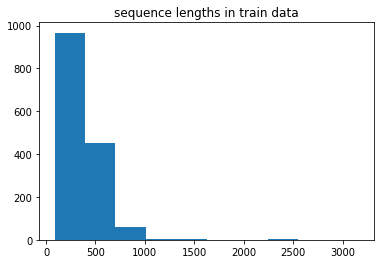

maximum sequence length: 3166


In [ ]:
np.random.seed(11)
train_d = data[:,0]
train_l = data[:,1]
test_d = test[:,1]
#test_l = test[:,1]
print(train_d.shape)
temp = list(zip(train_d, train_l))
np.random.shuffle(temp)
train_d, train_l = zip(*temp)


# process sentences to tokens
text_p = ["".join([char for char in line if char not in punctuation]) for line in train_d]
#print(text_p[0])
lines = [word_tokenize(contractions.fix(text)) for text in text_p]
train_data = [[word for word in words if len(word)>=2 and len(word)<15] for words in lines]

text_p = ["".join([char for char in line if char not in punctuation]) for line in test_d]
#print(text_p[0])
lines = [word_tokenize(contractions.fix(text)) for text in text_p]
test_data = [[word for word in words if len(word)>=2 and len(word)<15] for words in lines]

plt.title('sequence lengths in train data')
plt.hist([len(t) for t in train_data])
plt.show()
print(f"maximum sequence length: {max([len(t) for t in train_data])}")

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
X_tok = tokenizer.texts_to_sequences(train_data)

word_index = tokenizer.word_index
print("unique tokens except pad_token- "+str(len(word_index)))
vocab_size = len(tokenizer.word_index) + 1  #  pad_token at 0th index
print('vocab_size - '+str(vocab_size))
max_length = 500
padded_lines = pad_sequences(X_tok, maxlen=max_length, padding='post')
#create word list from token using utf8 encoding 
#word_list = [word for words in processedLines for word in words]


unique tokens except pad_token- 27615
vocab_size - 27616


In [ ]:

X_tok = tokenizer.texts_to_sequences(test_data)

word_index = tokenizer.word_index
print("unique tokens except pad_token- "+str(len(word_index)))
vocab_size = len(tokenizer.word_index) + 1  #  pad_token at 0th index
print('vocab_size - '+str(vocab_size))
max_length = 500
padded_lines_t = pad_sequences(X_tok, maxlen=max_length, padding='post')
#create word list from token using utf8 encoding 
#word_list = [word for words in processedLines for word in words]

unique tokens except pad_token- 27615
vocab_size - 27616


In [ ]:
  #padded_lines

In [ ]:

X_train = padded_lines
le = LabelEncoder()
y_test = pd.read_excel('Assignment4_TestLabels.xlsx').values[:,2]
print(y_test.shape)
y_train = le.fit_transform(np.array(train_l))
y_test = le.transform(y_test)
num_classes=5



(735,)


In [ ]:
X_test_w = padded_lines_t
'''le = LabelEncoder()
y_train = le.fit_transform(np.array(train_l))
num_classes=5'''

'le = LabelEncoder()\ny_train = le.fit_transform(np.array(train_l))\nnum_classes=5'

In [ ]:
'''model = Cnn(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs =  30
train_loss = []
val_loss = []
X_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)
X_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)
train_acc = 0
train_accs = []
valid_accs = []
for epoch in range(num_epochs):
    batch_loss = 0
    n_samples = 0
    train_acc = 0
    for X_train, y_train in zip(X_train_b,y_train_b):
        model.train()
        n_samples += X_train.shape[0]
        X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
        X_train, y_train = X_train.to(device).unsqueeze(1), y_train.to(device)
        
        # Forward pass 
        outputs = model(X_train)
        loss = error(outputs, y_train)
        batch_loss+=loss*X_train.shape[0]
        train_acc += torch.sum(y_train==torch.argmax(outputs,1)) 
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    print("No of epoch: {}, Training Loss: {} Acc: {}".format(epoch, batch_loss/n_samples,train_acc/n_samples))

    model.eval()
    
    output = model(X_val1)
    loss = error(output, y_val1)
    valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]
    print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))
    train_loss.append(batch_loss/n_samples)
    val_loss.append(loss)
    train_accs.append(train_acc/n_samples)
    valid_accs.append(valid_acc)
    
    
torch.save(model,'model.sav')

# ploting training loss per epochs
  
plt.title('training and validation loss per Epoch')
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.title('training and validation accuracy per Epoch')
plt.plot(train_accs,label='train')
plt.plot(valid_accs,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()'''

'model = Cnn(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)\nmodel.to(device)\n\nerror = nn.CrossEntropyLoss()\n\nlearning_rate = 0.001\noptimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)\n\nnum_epochs =  30\ntrain_loss = []\nval_loss = []\nX_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)\nX_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)\ntrain_acc = 0\ntrain_accs = []\nvalid_accs = []\nfor epoch in range(num_epochs):\n    batch_loss = 0\n    n_samples = 0\n    train_acc = 0\n    for X_train, y_train in zip(X_train_b,y_train_b):\n        model.train()\n        n_samples += X_train.shape[0]\n        X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)\n        X_train, y_train = X_train.to(device).unsqueeze(1), y_train.to(device)\n        \n        # Forward pass \n        outputs = model(X_train)\n        loss = error(outputs, y_train)\n        batch_loss+=loss*X_train.shape[0]\n      

In [ ]:
torch.cuda.empty_cache()
device

device(type='cuda')

In [ ]:
'''model = Cnn(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs =  30
train_loss = []
val_loss = []
X_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)
X_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)
train_acc = 0
train_accs = []
valid_accs = []
for epoch in range(num_epochs):
    batch_loss = 0
    n_samples = 0
    train_acc = 0
    for X_train, y_train in zip(X_train_b,y_train_b):
        model.train()
        n_samples += X_train.shape[0]
        X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
        X_train, y_train = X_train.to(device).unsqueeze(1), y_train.to(device)
        
        # Forward pass 
        outputs = model(X_train)
        loss = error(outputs, y_train)
        batch_loss+=loss*X_train.shape[0]
        train_acc += torch.sum(y_train==torch.argmax(outputs,1)) 
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    print("No of epoch: {}, Training Loss: {} Acc: {}".format(epoch, batch_loss/n_samples,train_acc/n_samples))

    model.eval()
    
    output = model(X_val1)
    loss = error(output, y_val1)
    valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]
    print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))
    train_loss.append(batch_loss/n_samples)
    val_loss.append(loss)
    train_accs.append(train_acc/n_samples)
    valid_accs.append(valid_acc)
    
    
torch.save(model,'model.sav')

# ploting training loss per epochs
  
plt.title('training and validation loss per Epoch')
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.title('training and validation accuracy per Epoch')
plt.plot(train_accs,label='train')
plt.plot(valid_accs,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()'''

'model = Cnn(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)\nmodel.to(device)\n\nerror = nn.CrossEntropyLoss()\n\nlearning_rate = 0.001\noptimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)\n\nnum_epochs =  30\ntrain_loss = []\nval_loss = []\nX_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)\nX_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)\ntrain_acc = 0\ntrain_accs = []\nvalid_accs = []\nfor epoch in range(num_epochs):\n    batch_loss = 0\n    n_samples = 0\n    train_acc = 0\n    for X_train, y_train in zip(X_train_b,y_train_b):\n        model.train()\n        n_samples += X_train.shape[0]\n        X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)\n        X_train, y_train = X_train.to(device).unsqueeze(1), y_train.to(device)\n        \n        # Forward pass \n        outputs = model(X_train)\n        loss = error(outputs, y_train)\n        batch_loss+=loss*X_train.shape[0]\n       

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


No of epoch: 0, Training Loss: 1.3257012367248535 Acc: 0.5251677632331848
Validation Loss: 0.853590726852417 Acc: 0.7382550239562988
No of epoch: 1, Training Loss: 0.4192633032798767 Acc: 0.9404362440109253
Validation Loss: 0.5008480548858643 Acc: 0.8355704545974731
No of epoch: 2, Training Loss: 0.17664091289043427 Acc: 0.9882550239562988
Validation Loss: 0.32014474272727966 Acc: 0.9161074161529541
No of epoch: 3, Training Loss: 0.07345665246248245 Acc: 0.9991610646247864
Validation Loss: 0.23460492491722107 Acc: 0.9328858852386475
No of epoch: 4, Training Loss: 0.029448173940181732 Acc: 1.0
Validation Loss: 0.1891273558139801 Acc: 0.9496644139289856
No of epoch: 5, Training Loss: 0.011835557408630848 Acc: 1.0
Validation Loss: 0.16189797222614288 Acc: 0.9597315192222595
No of epoch: 6, Training Loss: 0.004792902152985334 Acc: 1.0
Validation Loss: 0.14625795185565948 Acc: 0.9597315192222595
No of epoch: 7, Training Loss: 0.0019432142144069076 Acc: 1.0
Validation Loss: 0.136612430214881

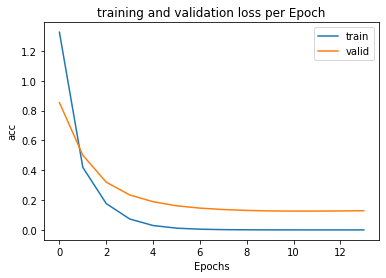

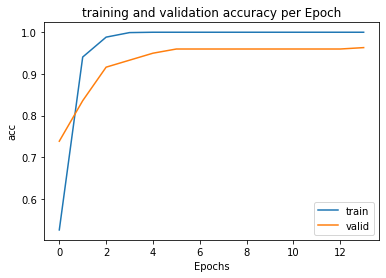

In [ ]:
model = Cnn(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.0004
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

num_epochs =  14
batch_size = 8
size = X_train.shape[0]
d = int(size/batch_size)
val_size = int(0.2*X_train.shape[0])
X_train_b = np.array_split(X_train[val_size:,:],d)
y_train_b = np.array_split(y_train[val_size:],d)
train_loss = []
val_loss = []

X_val = X_train[:val_size,:]
y_val = y_train[:val_size]
X_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)
X_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)

best_ac = 0
train_acc = 0
train_accs = []
valid_accs = []
for epoch in range(num_epochs):
    
    batch_loss = 0
    n_samples = 0
    train_acc = 0
    
    for X_train1, y_train1 in zip(X_train_b,y_train_b):
        model.train()
        n_samples += X_train1.shape[0]
        X_train1, y_train1 = torch.from_numpy(X_train1), torch.from_numpy(y_train1)
        X_train1, y_train1 = X_train1.to(device).unsqueeze(1), y_train1.to(device)
        
        # Forward pass 
        outputs = model(X_train1)
        loss = error(outputs, y_train1)
        batch_loss+=loss*X_train1.shape[0]
        train_acc += torch.sum(y_train1==torch.argmax(outputs,1)) 
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    print("No of epoch: {}, Training Loss: {} Acc: {}".format(epoch, batch_loss/n_samples,train_acc/n_samples))

    model.eval()

    output = model(X_val1)
    loss = error(output, y_val1)
    valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]
    print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))
    train_loss.append(batch_loss/n_samples)
    val_loss.append(loss)
    train_accs.append(train_acc/n_samples)
    valid_accs.append(valid_acc)
    if best_ac<valid_acc:
      best_ac = valid_acc
      torch.save(model,'model_cnn.sav')
    


# ploting training loss per epochs
  
plt.title('training and validation loss per Epoch')
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.title('training and validation accuracy per Epoch')
plt.plot(train_accs,label='train')
plt.plot(valid_accs,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [ ]:
k = torch.load('model1.sav')
k.eval()

output = k(X_val1)
loss = error(output, y_val1)
valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]

print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))


No of epoch: 0, Training Loss: 1.6260998249053955 Acc: 0.2625838816165924
Validation Loss: 1.5808436870574951 Acc: 0.30536913871765137
No of epoch: 1, Training Loss: 1.5344663858413696 Acc: 0.36157718300819397
Validation Loss: 1.714160680770874 Acc: 0.1812080591917038
No of epoch: 2, Training Loss: 1.4896012544631958 Acc: 0.34899330139160156
Validation Loss: 1.5546715259552002 Acc: 0.28523489832878113
No of epoch: 3, Training Loss: 1.4916430711746216 Acc: 0.3590604066848755
Validation Loss: 1.6606059074401855 Acc: 0.29530200362205505
No of epoch: 4, Training Loss: 1.4701263904571533 Acc: 0.38255032896995544
Validation Loss: 1.5380076169967651 Acc: 0.29530200362205505
No of epoch: 5, Training Loss: 1.4323073625564575 Acc: 0.38926175236701965
Validation Loss: 1.547812581062317 Acc: 0.3154362440109253
No of epoch: 6, Training Loss: 1.4438458681106567 Acc: 0.3783557116985321
Validation Loss: 1.6419503688812256 Acc: 0.3221476674079895
No of epoch: 7, Training Loss: 1.4208900928497314 Acc: 0

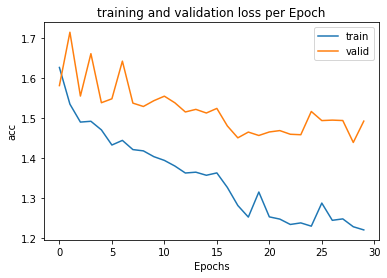

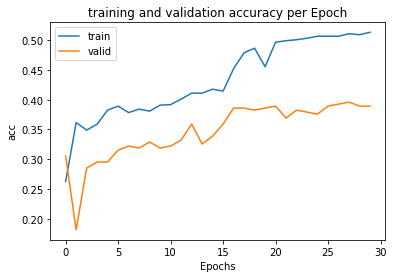

In [ ]:
model = CnnLstm(vocab_size=vocab_size,seq_len=max_length,output_dim=num_classes,embed_dim=100)
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.0004
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

num_epochs =  30
batch_size = 8
size = X_train.shape[0]
d = int(size/batch_size)
val_size = int(0.2*X_train.shape[0])
X_train_b = np.array_split(X_train[val_size:,:],d)
y_train_b = np.array_split(y_train[val_size:],d)
train_loss = []
val_loss = []

X_val = X_train[:val_size,:]
y_val = y_train[:val_size]
X_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)
X_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)


train_acc = 0
train_accs = []
valid_accs = []
for epoch in range(num_epochs):
    
    batch_loss = 0
    n_samples = 0
    train_acc = 0
    best_ac = 0
    for X_train1, y_train1 in zip(X_train_b,y_train_b):
        model.train()
        n_samples += X_train1.shape[0]
        X_train1, y_train1 = torch.from_numpy(X_train1), torch.from_numpy(y_train1)
        X_train1, y_train1 = X_train1.to(device).unsqueeze(1), y_train1.to(device)
        
        # Forward pass 
        outputs = model(X_train1)

        loss = error(outputs, y_train1)
        batch_loss+=loss*X_train1.shape[0]
        train_acc += torch.sum(y_train1==torch.argmax(outputs,1)) 
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    print("No of epoch: {}, Training Loss: {} Acc: {}".format(epoch, batch_loss/n_samples,train_acc/n_samples))

    model.eval()

    output = model(X_val1)
    loss = error(output, y_val1)
    valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]
    print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))
    train_loss.append(batch_loss/n_samples)
    val_loss.append(loss)
    train_accs.append(train_acc/n_samples)
    valid_accs.append(valid_acc)
    
    if best_ac<valid_acc:
      best_ac = valid_acc
      torch.save(model,'model_clstm.sav')

# ploting training loss per epochs
  
plt.title('training and validation loss per Epoch')
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.title('training and validation accuracy per Epoch')
plt.plot(train_accs,label='train')
plt.plot(valid_accs,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'

stop_words = set(['i','am','re','are','be','so','or','a','an','as','he','she','his','her','the','there','here','and','but','other','on','in','to','of','up','down','after','before','we','they','has','have', 'was','were','is','','it','how','that','at','go','is','do','will','shall','ve','if','may','might','by','s','o','d','t','my','might','all','out','for','ll'])
table = str.maketrans('','',punctuation)
train_p = []
test_p = []
for paragraph in train_d:
  tokens = contractions.fix(paragraph)
  temp = []
  for sentence in tokens.split('.'):
    if len(sentence)==0:
        continue
    #tokens = word_tokenize(tokens)
    token = [w.translate(table)  for w in sentence.split(' ') if len(w)>0 ]

    token = [w for w in token if w.isalpha()]
    token = [w for w in token if not w in stop_words]
    #print(token)
    temp.append(' '.join(token))
  train_p.append(temp)

for paragraph in test_d:
  tokens = contractions.fix(paragraph)
  temp = []
  for sentence in tokens.split('.'):
    if len(sentence)==0:
        continue
    #tokens = word_tokenize(tokens)
    token = [w.translate(table)  for w in sentence.split(' ') if len(w)>0 ]

    token = [w for w in token if w.isalpha()]
    token = [w for w in token if not w in stop_words]
    #print(token)
    temp.append(' '.join(token))
  test_p.append(temp)

'''for paragraph in test_d:
  tokens = contractions.fix(paragraph)
  temp = []
  for sentence in nltk.tokenize.sent_tokenize(tokens):
    #tokens = word_tokenize(tokens)
    token = [w.translate(table) for w in sentence.split(' ')]
    token = [w for w in token if w.isalpha()]
    token = [w for w in token if not w in stop_words]
    #print(token)
    temp.append(' '.join(token))
  test_p.append(temp)'''
print(test_p)

[['qpr keeper day heads preston queens park rangers keeper chris day set join preston month loan', 'day been displaced arrival simon royce who second month loan from charlton', 'qpr also signed italian generoso rossi', 'r manager ian holloway said some say risk can recalled during month simon royce can now recalled charlton', 'irons fire', 'had yes from couple others should need them', 'day rangers contract expires summer', 'meanwhile holloway hoping complete signing middlesbrough defender andy davies either permanently again loan saturday match ipswich', 'davies impressed during recent loan spell loftus road', 'holloway also chasing bristol city midfielder tom doherty'], ['software watching while you work software can not only monitor every keystroke action performed pc also used legally binding evidence wrongdoing been unveiled', 'worries about cybercrime sabotage prompted many employers consider monitoring employees', 'developers behind system claim breakthrough way data monitored s

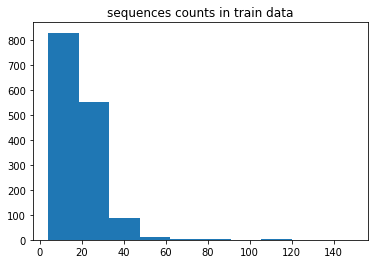

maximum sequence length: 149


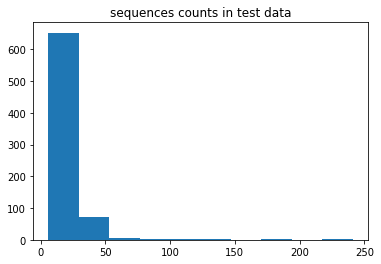

maximum sequence length: 241


In [ ]:

plt.title('sequences counts in train data')
plt.hist([len(t) for t in train_p])
plt.show()
print(f"maximum sequence length: {max([len(t) for t in train_p])}")

plt.title('sequences counts in test data')
plt.hist([len(t) for t in test_p])
plt.show()
print(f"maximum sequence length: {max([len(t) for t in test_p])}")


In [ ]:
url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(url)

def embed(input):
  return use_model(input)

In [ ]:
X_train = []

print(embed(['no aspirations social import inform movie version']).shape)
pad = np.zeros(512)
for p in tqdm(train_p):
  t = []
  k = 30
  for sen in p:
    if len(sen)!=0:
      temp=embed([sen])[0,:].numpy()
      t.append(temp)
      k-=1
      if k==0:
        break
  while k!=0:
    t.append(pad)
    k-=1
  X_train.append(np.array(t))

pad = np.zeros(512)
X_test = []

for p in tqdm(test_p):
  t = []
  k = 30
  for sen in p:
    if len(sen)!=0:
      temp=embed([sen])[0,:].numpy()
      t.append(temp)
      k-=1
      if k==0:
        break
  while k!=0:
    t.append(pad)
    k-=1
  X_test.append(np.array(t))

#le = LabelEncoder()
#y_train = le.fit_transform(np.array(train_l))
#y_train = np.array(y_train)
#y_test = np.array(test_l)

#X_train = np.array(X_train)
X_test = np.array(X_test)

#print('train:',X_train.shape,'test:',X_test.shape) 

(1, 512)


100%|██████████| 735/735 [01:49<00:00,  6.74it/s]


In [ ]:
'''np.all(X_test==0)
test_l = pd.read_csv('TestData_Labels.csv').values[:,1]
print(test_l.shape)
#y_train
y_test = le.transform(np.array(test_l))
y_test = np.array(y_test)
#y_test = np.array(test_l)'''

(735,)


In [ ]:

X_train = np.array(X_train)

<class 'numpy.ndarray'>
No of epoch: 0, Training Loss: 1.2628880739212036 Acc: 0.6652684807777405
Validation Loss: 0.6982505321502686 Acc: 0.9194630980491638
No of epoch: 1, Training Loss: 0.4085233211517334 Acc: 0.9555369019508362
Validation Loss: 0.22593727707862854 Acc: 0.9597315192222595
No of epoch: 2, Training Loss: 0.13422274589538574 Acc: 0.9807047247886658
Validation Loss: 0.1332123726606369 Acc: 0.9664429426193237
No of epoch: 3, Training Loss: 0.06372513622045517 Acc: 0.9890939593315125
Validation Loss: 0.10164017975330353 Acc: 0.963087260723114
No of epoch: 4, Training Loss: 0.03200928494334221 Acc: 0.9958053827285767
Validation Loss: 0.08824422210454941 Acc: 0.9664429426193237
No of epoch: 5, Training Loss: 0.014755834825336933 Acc: 1.0
Validation Loss: 0.08215887099504471 Acc: 0.9664429426193237
No of epoch: 6, Training Loss: 0.006243294570595026 Acc: 1.0
Validation Loss: 0.07926658540964127 Acc: 0.9731543660163879
No of epoch: 7, Training Loss: 0.0022543829400092363 Acc:

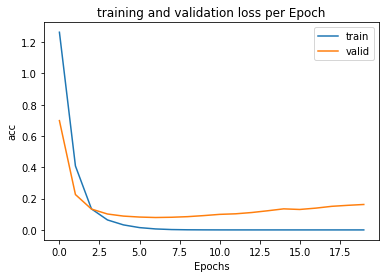

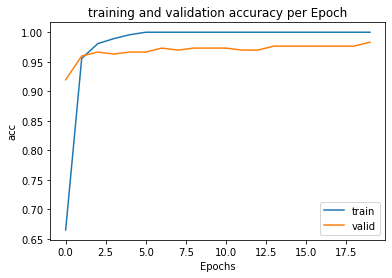

In [ ]:
vocab_dim = X_train.shape[2]
max_length = X_train.shape[1]
num_classes = 5
model = CnnSen(input_dim=vocab_dim,seq_len=max_length,output_dim=num_classes).to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.0001
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

num_epochs =  20
batch_size = 2
size = X_train.shape[0]
d = int(size/batch_size)
val_size = int(0.2*X_train.shape[0])
X_train_b = np.array_split(X_train[val_size:,:,:],d)
y_train_b = np.array_split(y_train[val_size:],d)
train_loss = []
val_loss = []

X_val = X_train[:val_size,:,:]
y_val = y_train[:val_size] 
print(type(X_val))
X_val1, y_val1 = torch.from_numpy(X_val), torch.from_numpy(y_val)
X_val1, y_val1 = X_val1.to(device).unsqueeze(1), y_val1.to(device)


train_acc = 0
train_accs = []
valid_accs = []
best_ac = 0
for epoch in range(num_epochs):
    
    batch_loss = 0
    n_samples = 0
    train_acc = 0
    
    for X_train1, y_train1 in zip(X_train_b,y_train_b):
        model.train()
        n_samples += X_train1.shape[0]
        X_train1, y_train1 = torch.from_numpy(X_train1), torch.from_numpy(y_train1)
        X_train1, y_train1 = X_train1.to(device).unsqueeze(1), y_train1.to(device)
        
        # Forward pass 
        outputs = model(X_train1.float())
        loss = error(outputs, y_train1)
        batch_loss+=loss*X_train1.shape[0]
        train_acc += torch.sum(y_train1==torch.argmax(outputs,1)) 
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    print("No of epoch: {}, Training Loss: {} Acc: {}".format(epoch, batch_loss/n_samples,train_acc/n_samples))

    model.eval()

    output = model(X_val1.float())
    loss = error(output, y_val1)
    valid_acc = torch.sum(y_val1==torch.argmax(output,1))/y_val1.shape[0]
    print("Validation Loss: {} Acc: {}".format(loss.data,valid_acc))
    train_loss.append(batch_loss/n_samples)
    val_loss.append(loss)
    train_accs.append(train_acc/n_samples)
    valid_accs.append(valid_acc)
    if best_ac<valid_acc:
      best_ac = valid_acc
      torch.save(model,'model_sen2.sav')

# ploting training loss per epochs
  
plt.title('training and validation loss per Epoch')
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.title('training and validation accuracy per Epoch')
plt.plot(train_accs,label='train')
plt.plot(valid_accs,label='valid')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import f1_score,classification_report
X_test1, y_test1= torch.from_numpy(X_test), torch.from_numpy(y_test)
X_test1,y_test1 = X_test1.to(device).unsqueeze(1), y_test1.to(device)
model = torch.load('model_sen2.sav')
model.eval()
output = model(X_test1.float())
#loss = error(output, y_test1)
test_acc = torch.sum(y_test1==torch.argmax(output,1))/y_test1.shape[0]
y_pred = le.inverse_transform(torch.argmax(output,1).detach().cpu().numpy())
#df = pd.DataFrame({'ArticleId':list(pd.read_csv('TestData_Labels.csv').values[:,0]),'Category':list(y_pred)})
#df.to_csv('result1.csv',index=False)
print("Using USE Test  Acc: {}, f1-score: {}".format(test_acc,f1_score(y_test,torch.argmax(output,1).detach().cpu().numpy(),average='micro')))
print(classification_report(y_test,torch.argmax(output,1).detach().cpu().numpy()))

Using USE Test  Acc: 0.9727891087532043, f1-score: 0.9727891156462585
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       176
           1       0.98      0.96      0.97       113
           2       0.98      0.97      0.97       143
           3       1.00      0.98      0.99       168
           4       0.95      0.99      0.97       135

    accuracy                           0.97       735
   macro avg       0.97      0.97      0.97       735
weighted avg       0.97      0.97      0.97       735



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:

from sklearn.metrics import f1_score,classification_report
X_test1, y_test1= torch.from_numpy(X_test_w), torch.from_numpy(y_test)
X_test1,y_test1 = X_test1.to(device).unsqueeze(1), y_test1.to(device)
model = torch.load('model_cnn.sav')
model.eval()
output = model(X_test1)
test_acc = torch.sum(y_test1==torch.argmax(output,1))/y_test1.shape[0]

print("Using only CNN Test  Acc: {}, f1-score: {}".format(test_acc,f1_score(y_test,torch.argmax(output,1).detach().cpu().numpy(),average='micro')))
print(classification_report(y_test,torch.argmax(output,1).detach().cpu().numpy()))

Using only CNN Test  Acc: 0.9537414908409119, f1-score: 0.9537414965986395
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       176
           1       0.93      0.97      0.95       113
           2       0.94      0.97      0.95       143
           3       0.99      0.97      0.98       168
           4       0.96      0.92      0.94       135

    accuracy                           0.95       735
   macro avg       0.95      0.95      0.95       735
weighted avg       0.95      0.95      0.95       735



In [ ]:
from sklearn.metrics import f1_score,classification_report
X_test1, y_test1= torch.from_numpy(X_test_w), torch.from_numpy(y_test)
X_test1,y_test1 = X_test1.to(device).unsqueeze(1), y_test1.to(device)
model = torch.load('model_clstm.sav')
model.eval()
output = model(X_test1)

test_acc = torch.sum(y_test1==torch.argmax(output,1))/y_test1.shape[0]

print("Using CLSTM Test Acc: {}, f1-score: {}".format(test_acc,f1_score(y_test,torch.argmax(output,1).detach().cpu().numpy(),average='micro')))
print(classification_report(y_test,torch.argmax(output,1).detach().cpu().numpy()))

Using CLSTM Test Acc: 0.3374149799346924, f1-score: 0.33741496598639453
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.50      0.01      0.02       113
           2       0.67      0.41      0.51       143
           3       0.27      0.90      0.41       168
           4       0.45      0.28      0.35       135

    accuracy                           0.34       735
   macro avg       0.38      0.32      0.26       735
weighted avg       0.35      0.34      0.26       735



In [ ]:
y_test

array([3, 4, 3, 0, 3, 3, 2, 2, 1, 0, 0, 4, 2, 4, 1, 3, 2, 4, 1, 1, 0, 2,
       3, 0, 2, 3, 0, 3, 3, 0, 2, 4, 0, 0, 3, 3, 3, 0, 1, 1, 4, 2, 1, 4,
       3, 4, 1, 0, 2, 0, 2, 0, 0, 0, 4, 0, 4, 1, 3, 4, 3, 1, 4, 2, 0, 1,
       3, 4, 3, 3, 0, 3, 0, 2, 4, 3, 4, 4, 4, 1, 2, 3, 1, 1, 0, 1, 0, 1,
       0, 4, 0, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 0, 3, 2, 3, 2, 1,
       3, 0, 1, 3, 2, 3, 2, 3, 2, 0, 1, 0, 1, 1, 4, 3, 0, 1, 0, 1, 0, 2,
       2, 4, 0, 0, 2, 4, 1, 3, 0, 4, 3, 1, 2, 3, 3, 1, 1, 4, 0, 4, 2, 1,
       3, 3, 3, 3, 1, 4, 0, 4, 0, 4, 0, 4, 1, 4, 4, 2, 0, 2, 0, 0, 1, 2,
       4, 0, 0, 4, 3, 2, 3, 2, 4, 4, 2, 0, 2, 4, 2, 0, 1, 3, 4, 4, 0, 4,
       2, 0, 3, 2, 0, 1, 0, 0, 3, 4, 0, 3, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1,
       3, 1, 2, 2, 4, 1, 0, 2, 0, 4, 0, 3, 2, 2, 0, 2, 3, 0, 1, 2, 3, 2,
       0, 3, 4, 0, 2, 0, 2, 0, 0, 3, 4, 2, 1, 4, 1, 4, 3, 3, 4, 3, 3, 3,
       1, 3, 2, 1, 0, 3, 0, 3, 2, 3, 1, 0, 0, 1, 2, 0, 3, 3, 4, 3, 3, 1,
       0, 3, 4, 2, 1, 0, 0, 2, 3, 1, 2, 0, 3, 3, 4,